In [1]:
%cd ../..

/home/eli/AnacondaProjects/electropysiology


In [2]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

import electropysiology as epys

In [3]:
data = sio.loadmat('/home/eli/Documents/Data/LabAssignment/data.mat', simplify_cells=True, struct_as_record=False)

/home/eli/miniforge3/envs/ephys/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [4]:
electrode_info = pd.read_csv('/home/eli/Documents/Data/LabAssignment/electrodeInfo.csv')

In [5]:
trial_info = pd.read_csv('/home/eli/Documents/Data/LabAssignment/trialInfo.csv')

In [6]:
dt = data['lfpSchema']['smpInterval'][0]

In [7]:
times = data['lfpSchema']['index'][0]

In [8]:
good_trials = np.nonzero(trial_info['badTrials'].to_numpy() == 0)[0]

In [9]:
lfp = epys.recording.Signal(electrode_info, data['lfp'].swapaxes(0, 1)[:, :, good_trials], dt, times)

In [10]:
events = collections.OrderedDict({
    'trialStart': None,
    'fixptOn': None,
    'fixationTime': None,
    'sampleOn': None,
    'sampleOff': None,
    'testOn': None,
    'responseDone': None,
})

In [11]:
for event in events:
    events[event] = trial_info[event].to_numpy()[good_trials]

In [12]:
trials = epys.recording.ConditionTrials(events, lfp=lfp)

In [13]:
cued_lfp = trials.time_lock('sampleOn', duration=0.5, before=0.5).lfp

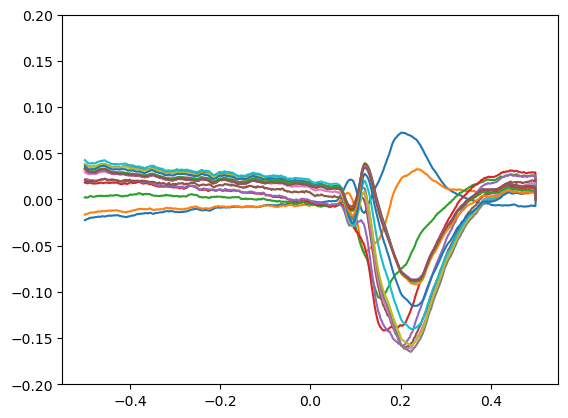

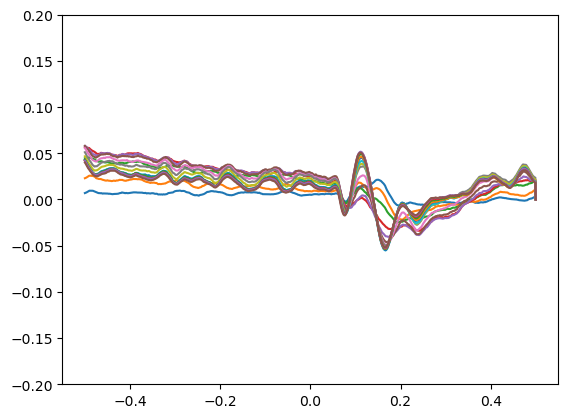

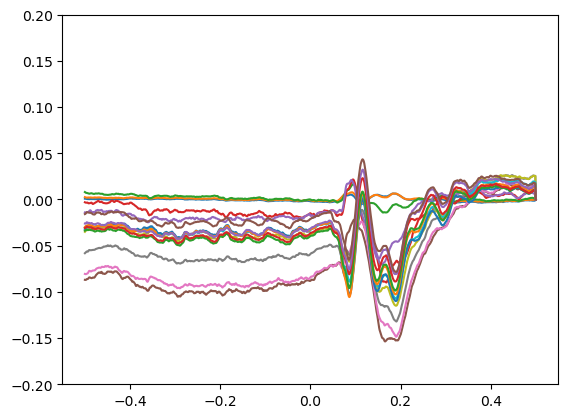

In [16]:
for area in ['VLPFC1', '7A', 'V4 Foveal']:
    lfp = cued_lfp.select_channels('area', area)
    lfp.erp.plot()
    ax = plt.gca()
    ax.set_ylim(bottom=-0.2, top=0.2)
    plt.show()